# Actividad 7 - Árboles de Regresión

### Desafío 1: Preparación del ambiente de trabajo
- Importe las librerías clásicas a utilizar.
- Para este ejercicio implementaremos árboles de regresión, por lo que deberá importar la clase DecisionTreeRegressor 
- De manera adicional importe las funciones y clases necesarias para generar un desempeño de métricas en problemas de regresión, división de muestras y búsqueda de grilla con validación cruzada.
- Elimine la columna 'Unnamed: 0' cuando cargue los datos.

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
import helpers
import pickle


In [130]:
df = pd.read_csv('ames_housing.csv').drop(columns='Unnamed: 0')

In [131]:
df.head()

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,None,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.638933,42.060899


### Desafío 2: Feature engineering
- Identifique si el dtype de cada pd.Serie en nuestra base de datos se considera 'object' o no. Para todas las variables que sean 'object' , realice lo siguiente:
- 1. Genere una recodificación $K-1$ en cada variable. Para efectos prácticos sólo necesitan eliminar una de las categorías, no se concentren en especificar la categoría a eliminar. Pueden utilizar la función pd.get_dummies con la opción drop_first para ello.
- Utilizando el método pd.concat , concatene a los atributos creados en la base de datos. tip: No se olvide de eliminar los atributos recodificados, de esta forma evitará un aumento artificial del desempeño del modelo.

In [132]:
for colname, serie in df.iteritems():    
    if(serie.dtype == 'object'):
        df = pd.concat([df, pd.get_dummies(serie, drop_first=True, prefix=colname)], axis=1).drop(columns=colname)
        


In [133]:
df.shape

(2930, 307)

### Desafío 3: Primer modelo
- Genere muestras de entrenamiento y validación con 'Sale_Price' como vector objetivo y los atributos de la base de datos como matriz.
- Recuerde definir el porcentaje de casos en la muestra de validación y una semilla pseudoaleatoria.
- Posteriormente, entrene un árbol de regresión en la muestra de entrenamiento sin modificar los hiperparámetros. Reporte las principales métricas de desempeño.
- Comente sobre el desempeño.

In [178]:
seed = 100
p_muestra = 0.30

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Sale_Price']), df['Sale_Price'], test_size=p_muestra, random_state=seed)


In [179]:
modelo_1 = DecisionTreeRegressor(random_state=seed).fit(X_train, y_train)

print("Test MSE:", mean_squared_error(y_test, modelo_1.predict(X_test)).round(5))
print("Test MAE:", median_absolute_error(y_test, modelo_1.predict(X_test)).round(5))
print("Test R2:", r2_score(y_test, modelo_1.predict(X_test)).round(5))

Test MSE: 1735925856.16382
Test MAE: 16500.0
Test R2: 0.76235


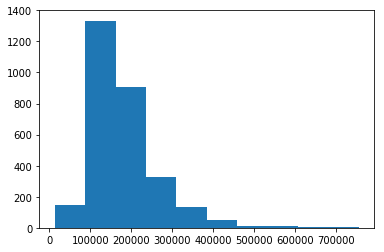

In [180]:
df['Sale_Price'].hist(grid=False)

- El error el muy alto, el modelo no explica el comportamiento de los datos.


### Desafío 4: Importancia relativa
- Implemente el método plot_importance utilizado en la lectura para reportar la importancia relativa de los atributos.
- Comente sobre cuáles son los principales 10 atributos que afectan la predicción de Sale_Price .
- Separe éstos 10 atributos en una nueva base de datos, junto con el vector objetivo.

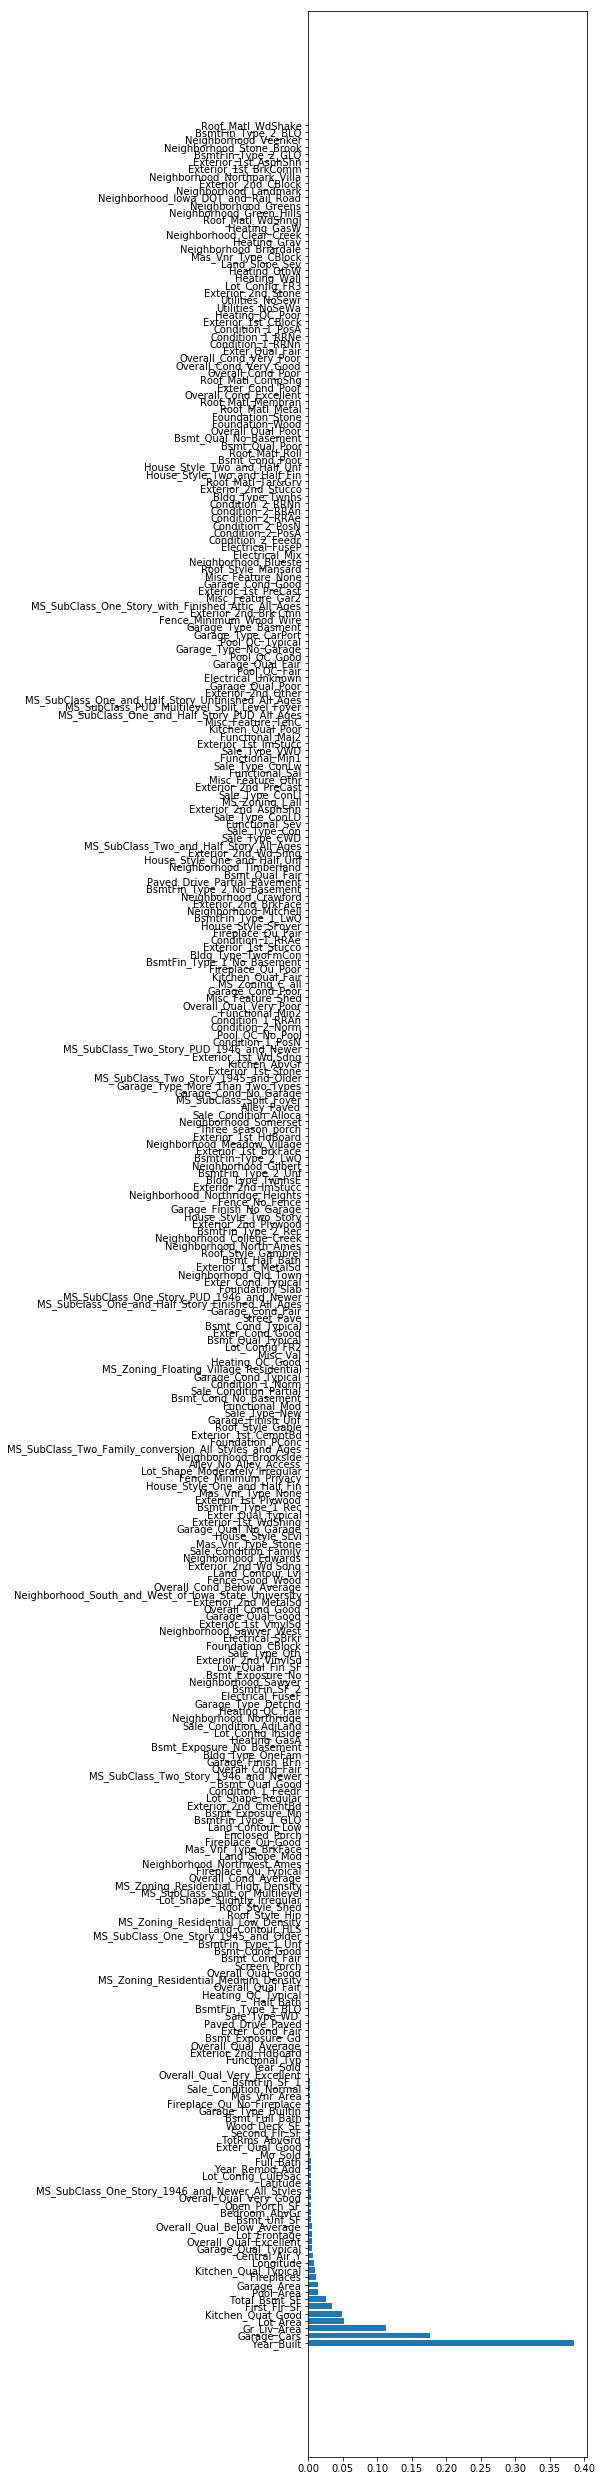

In [181]:
plt.figure(figsize = (5,45))

feat_names = X_test.columns

tmp_importance = modelo_1.feature_importances_
    # sort features
sort_importance = np.argsort(tmp_importance)[::-1]
    # associate feat_names with its relative importance
names = [feat_names[i] for i in sort_importance]
    # plot
plt.barh( range(len(feat_names)), tmp_importance[sort_importance])
    # add axis labels identifying attribute name
plt.yticks(range(len(feat_names)), 
               names, rotation=0);

In [182]:
top10= pd.DataFrame(
        {'name': X_train.columns,
         'score': modelo_1.feature_importances_}
)

top10.sort_values(by='score', ascending=False)

df_10 = df[top10[:10]['name']]
df_10 = pd.concat([df_10,df['Sale_Price']],axis=1)

In [183]:
df_10.columns

Index(['Lot_Frontage', 'Lot_Area', 'Year_Built', 'Year_Remod_Add',
       'Mas_Vnr_Area', 'BsmtFin_SF_1', 'BsmtFin_SF_2', 'Bsmt_Unf_SF',
       'Total_Bsmt_SF', 'First_Flr_SF', 'Sale_Price'],
      dtype='object')

In [184]:
df10.head()

,Lot_Frontage,Lot_Area,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,First_Flr_SF,Sale_Price
0,141,31770,1960,1960,112,2,0,441,1080,1656,215000
1,80,11622,1961,1961,0,6,144,270,882,896,105000
2,81,14267,1958,1958,108,1,0,406,1329,1329,172000
3,93,11160,1968,1968,0,1,0,1045,2110,2110,244000
4,74,13830,1997,1998,0,3,0,137,928,928,189900


### Desafío 5: Refactorización del modelo y pickling
- En función de los atributos seleccionados en el ejercicio anterior, vuelva a generar conjuntos de entrenamiento y validación.
- Dentro de los datos de entrenamiento genere una búsqueda de grila con GridSearchCV utilizando los siguientes hiperparámetros:
- Máximo de atributos: Evalúe todos los posibles atributos.
- Máximo de profundidad: entre 1 a 32.
- Validaciones cruzadas : 5.
- Reporte la mejor combinación de hiperparámetros y su desempeño asociado. Compare el desempeño en la muestra de valudación con el modelo por defecto.

In [185]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_10.drop(columns=['Sale_Price']), df_10['Sale_Price'], test_size=p_muestra, random_state=seed)


In [186]:
%%time

parametros = {
'max_depth': np.linspace(1, 32, 32),
'max_features': list(range(1,X_train_2.shape[1]))
}

dec_tree_grid_cv = GridSearchCV(DecisionTreeRegressor(random_state=seed),
parametros,
cv=5,
n_jobs=-1).fit(X_train_2, y_train_2)

CPU times: user 2.02 s, sys: 252 ms, total: 2.28 s
Wall time: 14.3 s


In [187]:
print("Los mejores parámetros son: {}".format(dec_tree_grid_cv.best_params_))
modelo_2 = dec_tree_grid_cv.best_estimator_

Los mejores parámetros son: {'max_depth': 6.0, 'max_features': 7}


In [188]:
print("Test MSE:", mean_squared_error(y_test_2, modelo_2.predict(X_test_2)).round(5))
print("Test MAE:", median_absolute_error(y_test_2, modelo_2.predict(X_test_2)).round(5))
print("Test R2:", r2_score(y_test_2, modelo_2.predict(X_test_2)).round(5))

Test MSE: 2414291897.4565
Test MAE: 21491.20833
Test R2: 0.66948


 - El modelo empeoró respecto al por defecto en todos los indicadores
 

In [189]:
pickle.dump(modelo_2, open('andres-gallardo-actividad07.sav','wb'))